# Demo 3: Intro to condensate phase and collective modes 

This notebook runs locally and uses **0 jobs**


You can use the Oqtant Simulator ([Simulator Walkthrough](https://oqtant-docs.infleqtion.com/examples/walkthroughs/walkthrough_6_simulator/)) to explore outputs not available on the hardware such as dynamics of the Bose-Einstein condensate (BEC) at all times, and properties of the condensate's wave function (the collective quantum state occupied by thousands of atoms), including its phase. 

In this demo, we show how you can use the phase to better understand what is happening with the condensate. In particular, we focus on the simple connection between variations of the phase in space and the collective motion of the atoms in the condensate.  

We start by putting the condensate in motion by flashing a sloped Landscape object onto the atoms. Classically, we can think of this as setting the pendulum of a clock in motion. The Oqtant Simulator shows us how flashing a Landscape object imprints a phase onto the condensate. In the case of a sloped landscape, this results in a simple back-and-forth, clock-like motion of the center of mass of the condensate.  Such repeated patterns of collective motion are known as collective modes--in this case we explore the dipole mode.    

The flashing of a sloped Landscape object onto the condensate is a simple example of the more general process of phase engineering a quantum state.


## Imports and user authentication ##

In [8]:
from oqtant.schemas.quantum_matter import QuantumMatterFactory

qmf = QuantumMatterFactory()

### Authenticate automatically ###

The easiest way to authenticate as an Oqtant user is to execute the following cell.  This will activate a widget that will let you sign in.  
If popups are blocked, or you are on a system that does not support this method, please follow the steps just below to authenticate manually instead.   
Note that currently the *automatic authentication method is only compatible with classic jupyter notebooks*, and not jupyter lab, nanohub, binder, colab, etc.

In [ ]:
qmf.get_login()

### Authenticate manually ###

If you cannot use the automatic authentication method above, you can instead authenticate using a slightly more manual process:  

1. Copy your access token from [oqtant.infleqtion.com/oqtantAPI](https://oqtant.infleqtion.com/oqtantAPI)
2. Paste that token just below and execute the cell (the if statement keeps the code from executing if you already authenticated above)

In [5]:
if qmf.login.access_token == "":
    qmf.login.access_token = "Paste your token here between the quotes!"

### Get client ###

At this point you should have a valid access token and be able to establish a *client* for communicating with the Oqtant REST service.  Executing the cell just below should show your current job quota limits.

In [ ]:
qmf.get_client()

## Construct a linear landscape potential

Start by flashing a linearly sloped landscape onto the atoms, setting the position and heights first.

Text(0, 0.5, 'Landscape height (kHz)')

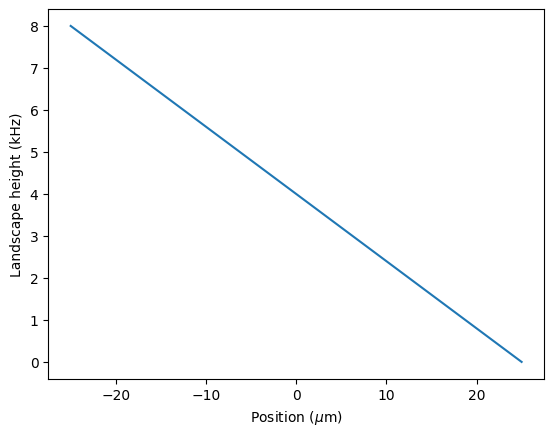

In [3]:
positions = [-25, 25]
heights_ramp = [8, 0]

plt.figure()
plt.plot(positions, heights_ramp)
plt.xlabel("Position ($\mu$m)")
plt.ylabel("Landscape height (kHz)")

Now feed the heights and positions into a dynamical landscape object. We will flash the landscape on and off rapidly within 1 ms so that the phase is imprinted on the condensate before the atoms have a chance to react. This is achieved using two snapshots as shown below.   

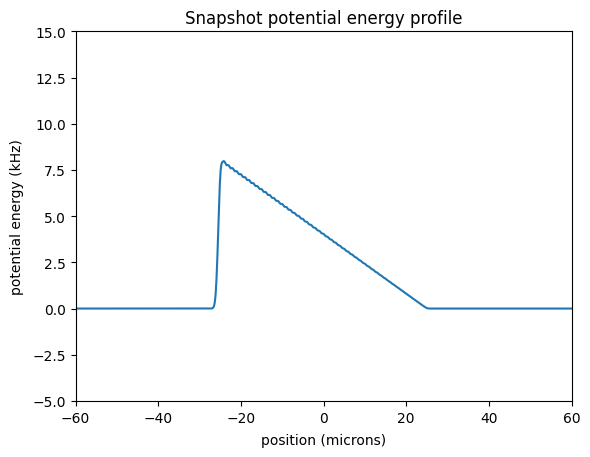

In [4]:
time_evolve = 1  # end time for periodic snapshot

snapshot_zero = qmf.create_snapshot(
    time=0, positions=positions, potentials=heights_ramp, interpolation="LINEAR"
)

snapshot_one = qmf.create_snapshot(
    time=time_evolve,
    positions=[0, 0],
    potentials=[0, 0],
    interpolation="LINEAR",
)

snapshot_zero.show_potential(xlimits=[-60, 60], ylimits=[-5, 15])

Notice the ripples on the snapshot potential.  This results from the landscape being composed of many Gaussian barriers as discussed in walkthrough [#4](https://oqtant-docs.infleqtion.com/examples/walkthroughs/walkthrough_4_optical_landscapes/).  The Oqtant Simulator uses this same potential shape in order to incorporate hardware realities.

## Create jobs with different durations ##

Next we create two quantum matter jobs using these snapshots. ```sim_matter_imprint``` is a short job to help us see the phase imprint on the BEC while the landscape is on. ```sim_matter_collective``` is a longer job that will show us the collective motion of the atoms that results at later times. 

In [5]:
landscape_slant = qmf.create_landscape(snapshots=[snapshot_zero, snapshot_one])
sim_matter_imprint = qmf.create_quantum_matter(
    landscape=landscape_slant,
    image="IN_TRAP",
    lifetime=5,
    name="dipole mode imprinting",
)

sim_matter_collective = qmf.create_quantum_matter(
    landscape=landscape_slant,
    image="IN_TRAP",
    lifetime=80,
    name="dipole mode collective motion",
)

Now let's visualize the time dependence of the Landscape Object. We see that it flashes on and off within 1 msec. 

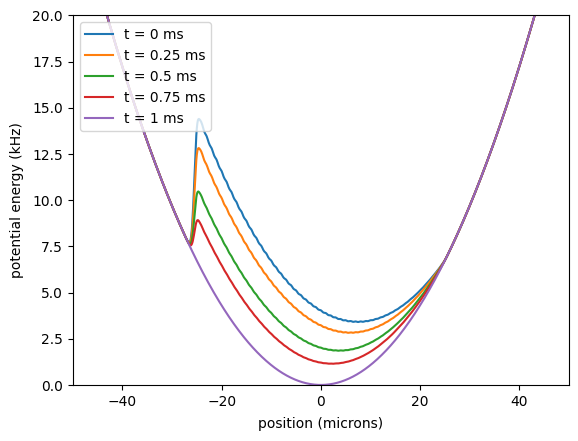

In [6]:
sim_matter_imprint.show_potential(
    [0, 0.25, 0.5, 0.75, 1], xlimits=[-50, 50], ylimits=[0, 20]
)

## Submit the shorter job to the Oqtant Simulator ##

Let's submit the first (shorter) ```sim_matter_imprint``` job to understand the effect of flashing on the landscape. 

In [7]:
sim_matter_imprint.submit(sim=True)
sim_matter_imprint.get_result()

submitted simulation
ground state calculation in progress       
ground state calculation complete          
trapped simulation in progress             
trapped simulation complete                   
Simulation complete.


### Create Animations 

With the Oqtant Simulator, we can access the dynamics of the condensate, as opposed to still image returned at the completion of a hardware job. Let's take advantage of this additional information to stitch together pictures of the condensate into an animation.

Note:  For longer jobs, it can be computationally intense to generate animations unless the frame_interval is set larger than 1.


In [8]:
density_animation = sim_matter_imprint.sim.animate_density(
    frame_interval=1, show_potential=True
)
HTML(density_animation.to_jshtml())

Great! We can actually see what's happening in time to the density and the potential landscape, however the atoms haven't yet had time to react to the landscape. Let's see what's going on with the phase.  

In [9]:
phase_animation = sim_matter_imprint.sim.animate_phase(
    frame_interval=1, show_potential=True
)
HTML(phase_animation.to_jshtml())

There's a lot of information in this animation, so try clicking through it, frame-by-frame. What do you see?

The phase starts out uniform, which is a reflection of the coherence of an undisturbed condensate.  The bulk of the condensate is between -12 $\mu$m and 12 $\mu$m in the x-direction and -2 $\mu$m and 2 $\mu$m in the R-direction, which is the radial distance away from the x-axis.  Outside of these regions, the condensate density is very low, and we can ignore the phase as it can become noisy and rapidly varying.  

By 0.16 ms a pattern appears in the phase.  At x = -10 $\mu$m, we can see that the phase is negative and at x = 10 $\mu$m it is positive.  In between the phase increases linearly with x.  We are seeing the sloped landscape imprinted onto the condensate phase, and the characteristic ripples are visible for -10 $\mu$m < x < 10 $\mu$m.

At 0.32 ms, we see that the phase has become less negative at x = -10 $\mu$m but is now also negative at x = 10 $\mu$m.  Additionally, there is a rapid change of the phase near x = 5 $\mu$m.  


What is going on there?  The phase is measured in radians, and it is only defined mathematically between $-\pi$ and $\pi$.  If the phase at a point in space increases beyond $\pi$ as the condensate evolves in time, it resets to $-\pi$ and so on.  This seems strange, however we are used to it from everyday experience with clocks that run from 0 to 12 hours and then pass from 12 to 0 hours at noon and midnight.  We illustrate this with analogy to the face of a clock:
![Condensate_Phase](images/Condensate_Phase.png)
Where we have also shown unraveled versions of the clock and condensate phase to show how the mapping is performed on a line segment.  


Now click through frames to the end of the simulation. Watch as the phase reset (blue/red boundary) moves to the right across the condensate and then reappears from the left edge. What is happening to the condensate atoms? We will now look at an animation of the current, something not available with the hardware. 

In [11]:
profiles_animation = sim_matter_imprint.sim.animate_profiles(frame_interval=1)
HTML(profiles_animation.to_jshtml())

In [10]:
current_animation = sim_matter_imprint.sim.animate_current(frame_interval=1)
HTML(current_animation.to_jshtml())

The current provides information about the total number (#) of atoms moving left (negative current) or right (positive current) per ms. The current depends on each atom's velocity, as well as the number of atoms at a particular point in the trap.

Click through the frames of the two animations.  What do you find?

* At 0.0 ms, the current is zero.  The atoms have not yet had time to react to the flashed landscape.  

* At 0.16 msec, we see a positive current forming.  The cloud profile has started to move to the right without changing shape.   

As we click through more frames, the current grows and the peak shifts slightly to the right -- the cloud is flowing and so the peak of the cloud moves accordingly without changing shape. 

The current declines towards the end of the animation, indicating that the atoms that had been moving to the right are slowing down as they approach the right side of the trap (similar to kicking a ball up a half-pipe, except the atoms are moving collectively).

### Concept Check-In

How can we relate the flashed landscape to what we saw in the phase and current animations? First, the sloped landscape was imprinted as a sloped phase of the condensate. The changes of the phase in space correspond to flows of atoms, and in this case a constant slope served to collectively kick the atoms to the right up the side of the trap.  

What would happen if we imprinted something other than a sloped landscape onto the atoms, like a triangle? Give it a try and see what kind of phase patterns and currents you can produce!

## Submit the longer job to the Oqtant Simulator ##

Now we want to see the collective motion of the atoms over longer timescales, so that we can see the dipole mode oscillation at the frequency of the trap in the x-direction. With a frequency of 50 Hz we need a simulation lasting tens of milliseconds to see the center of mass of the condensate oscillate back and forth. This motion is known as the dipole mode and was one of the first collective modes to be explored following the Nobel-Prize demonstrations of Bose-Einstein condensation in cold atomic gases.

Note:  For longer jobs, it can be computationally intense to generate animations unless the frame_interval is set larger than 1.  

In [12]:
sim_matter_collective.submit(sim=True)
sim_matter_collective.get_result()

submitted simulation
ground state calculation in progress       
ground state calculation complete          
trapped simulation in progress             
trapped simulation complete                     
Simulation complete.


### Collective motion visualization

Let's perform some analytics to better visualize the collective motion of the atoms over the course of the simulation.  First we extract slices along the x-axis and stitch them together to visualize the evolution.

In [13]:
# let's get the simulation grids
dx, Lx, x_1d = sim_matter_collective.sim.get_grids(time_ms=2)

# and the slice_x for the first frame that we want to extract from the simulator
_, _, _, slice_x = sim_matter_collective.sim.get_column_densities(time_ms=2)


# stitch together slices at each ms from 2 ms to 80 ms.
time = [i for i in range(2, 81)]
slices = [np.array(deepcopy(slice_x))]

for t in time[1:]:
    _, _, _, slice_x = sim_matter_collective.sim.get_column_densities(time_ms=t)
    slices.append(slice_x)

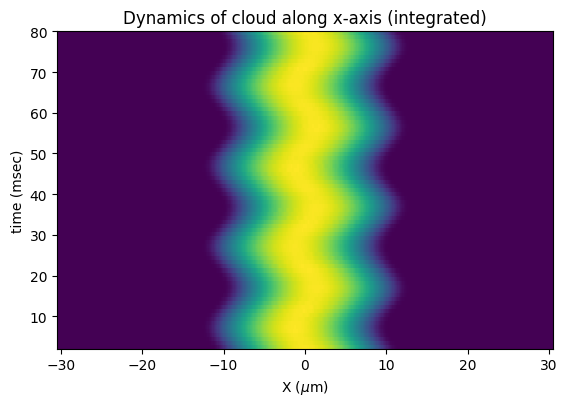

In [14]:
# plot the slices
plt.imshow(
    slices,
    extent=[x_1d[0], x_1d[-1], time[0], time[-1]],
    interpolation="nearest",
    aspect=0.5,
)
plt.xlabel("X ($\mu$m)")
plt.ylabel("time (msec)")
plt.title("Dynamics of cloud along x-axis (integrated)")
plt.show()

Cool!  The condensate is oscillating back and forth in a clock-like motion.  This is the dipole mode.  Let's use the scipy library to track the movement of the center of mass of the condensate.  

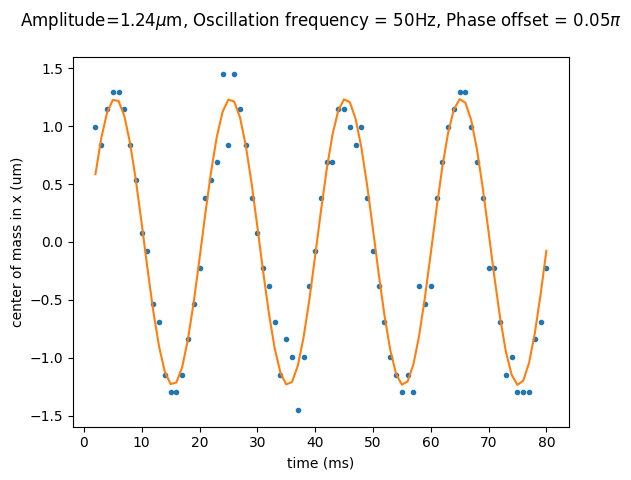

In [15]:
peak_x_list_sim = []


for i in range(len(slices)):
    # find cloud center by smoothing slice, and finding the peak
    CM_x = x_1d[slices[i].argmax()]
    peak_x_list_sim.append(CM_x)


def sine_X(t, A, f, phi):
    dc_offset = 0
    return A * np.sin(t * np.pi * 2 * f - (phi * np.pi)) - dc_offset


popt, pcov = curve_fit(sine_X, time, peak_x_list_sim, p0=[10, 0.05, 0])

fit_output = sine_X(np.array(time), *popt)

plt.plot(time, peak_x_list_sim, ".")
plt.plot(time, fit_output)
freq = int(popt[1] * 1000)
phase = popt[1]
amplitude = popt[0]
plt.title(
    f"Amplitude={amplitude:2.2f}$\mu$m, Oscillation frequency = {freq:d}Hz, Phase offset = {phase:.2f}$\pi$\n "
)
plt.xlabel("time (ms)")
plt.ylabel("center of mass in x (um)")

plt.show()

Now, let's overlay our results.

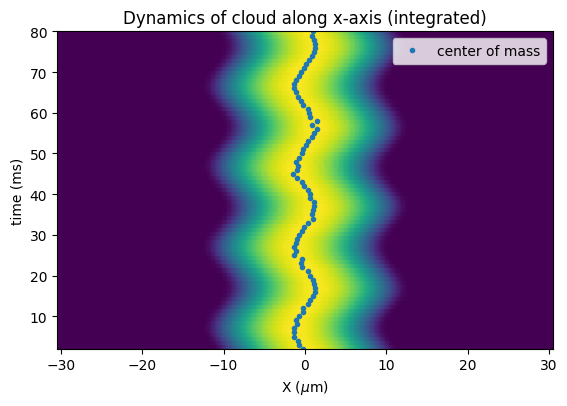

In [16]:
plt.imshow(
    slices,
    extent=[x_1d[0], x_1d[-1], time[0], time[-1]],
    interpolation="nearest",
    aspect=0.5,
    label="slice",
)
plt.plot(np.flip(peak_x_list_sim), time, ".", label="center of mass")
plt.xlabel("X ($\mu$m)")
plt.ylabel("time (ms)")
plt.title("Dynamics of cloud along x-axis (integrated)")
plt.legend()
plt.show()

## Conclusion ##

We see that the dipole mode corresponds to the motion of the center of mass of the system, much like a grandfather clock ticking back and forth.  In fact, the dipole mode has special significance because its motion does not dampen and is unaffected by temperature, interactions between atoms, and the quantum statistics of the atoms.  Researchers use the ticking of this mode to calibrate their experiment as the ticking rate reveals the frequencies of the confining trap, which are not always known precisely.  Try running this same job on the hardware and see what you get!

There are many other collective modes that can be explored on the Oqtant Simulator and hardware.  Try flashing on different sloped landscapes including triangles, inverted triangles, sawtooths, curved landscapes, and more!

If you are interested in reading more about collective modes in Bose-Einstein condensates, you can check out this [early paper](https://www.researchgate.net/profile/Nicolaas-Van-Druten/publication/13227553_Collective_Excitations_of_a_Bose-Einstein_Condensate_in_a_Magnetic_Trap/links/0c96053674712967b8000000/Collective-Excitations-of-a-Bose-Einstein-Condensate-in-a-Magnetic-Trap.pdf]) on the topic as well as [this](https://www.researchgate.net/profile/S-Giorgini/publication/286151207_Theory_of_trapped_Bose-condensed_gases/links/569def4e08ae950bd7a73acc/Theory-of-trapped-Bose-condensed-gases.pdf) review.  Phase engineering will also be the subject of forthcoming demos, and if you are interested more in the topic, have a look at one of the [first works](https://www.researchgate.net/profile/E-Hagley/publication/51360828_Generating_Solitons_by_Phase_Engineering_of_a_Bose-Einstein_Condensate/links/0912f50e46bc783e58000000/Generating-Solitons-by-Phase-Engineering-of-a-Bose-Einstein-Condensate.pdf) on this topic. 



## Bonus:  Mathematics behind phase imprinting ##

The dipole mode studied in this demo can be understood via analogies with the classical motion of a clock pendulum.  

It is also instructive to see how it works out quantum mechanically beginning from the wave function for the condensate, which describes the *collective* quantum state of the condensed atoms
<h1><center>$\psi = \sqrt{n}e^{iS}$</center></h1>
Here, $n$ is the density of atoms in the condensate and $S\in[-\pi,\pi]$ is the phase, which was explained earlier in the demo with the clock face analogy.  

The condensate has a characteristic reaction time $t_c = \hbar/\mu$, where $\mu$ is the chemical potential of the condensate, which reflects the change in energy with atom number due to the reservoir role of the condensate.  For the Oqtant Simulator parameters [link], this time is roughly 0.7 ms.  If a Landscape object is applied for much longer than this time, the atoms in the condensate will begin to move, spoiling the phase imprinting.  This is why the Landscape object in this demo was constructed from two snapshots a time $t_\mathrm{flash} = 1$ ms apart, which is the fastest time available on the hardware.  Although $t_c \sim t_\mathrm{flash}$, we work out the derivation in the case where these timescales are well separated in order to obtain a simple results, capturing the important physics. 

Because the condensate is a quantum fluid (a superfluid), we are interested in calculating its flow along the x-direction, which is quantified by the current
<h1><center>$j = -\frac{i\hbar}{2m}\left(\psi^*\frac{\partial \psi}{\partial x} - \psi\frac{\partial \psi^*}{\partial x}\right) = n\frac{\hbar}{m}\frac{\partial S}{\partial x}$</center></h1>
where $\hbar$ is planck's constant $h$ divided by $2\pi$, and $m$ is the mass of an individual atom (Rubidium - 87 in our case). 


We see that we need to know about the condensate phase to determine the current, so let's calculate this next.  We assume that the condensate does not have an appreciable velocity while the landscape is being applied and ignoring the quantum pressure inside the cloud, we obtain
<h1><center>$\hbar \frac{\partial S}{\partial t} + (\mu + V_\mathrm{landscape}) = 0$</center></h1>
where $V_\mathrm{landscape}$ is the landscape potential.  It is clear now why the timescale $t_c$ is important as it sets the rate of change of the condensate phase.  

Let's set $S(t=0) = 0$, then if our landscape is flashed on faster than $t_c$, we can assume that $\mu$ remains constant and we get a simple expression
<h1><center>$S(t_\mathrm{flash}) = \frac{t_\mathrm{flash}}{\hbar} (\mu + V_\mathrm{landscape})$</center></h1>
where $t_\mathrm{flash} = 1$ ms is the time between the snapshots.  The superfluid velocity imparted to the atoms by the landscape in this case is 
<h1><center>$v_s = \frac{j}{n} = \frac{\hbar}{m}\frac{\partial S}{\partial x} = \frac{t_\mathrm{flash}}{\hbar}\frac{\partial V_\mathrm{landscape}}{\partial x}$</center></h1>
We recognize $F_\mathrm{landscape} = -\frac{\partial V_\mathrm{landscape}}{\partial x}$ as the local classical force applied to the condensate atoms.  In the case of the downward sloping landscape used in this notebook, we have a constant positive force
<h1><center>$F_\mathrm{landscape} = \frac{h *(8\text{ kHz})}{50\text{ }\mu\text{m}} = 1.1\times 10^{-25}\text{ Newtons}$</center></h1>
This is an extremely (!) tiny force by everday standards, however we recall that is being applied to each atom individually.  Because of this, we find that the velocity imparted to each atom is
$v_s = 0.7 \frac{\mu\text{m}}{\text{ms}}$, which is observable on the Oqtant hardware.

Now, this is the velocity is imparted to the center of mass of the cloud when the atoms lie at the bottom of the magnetic trap.  As the cloud travels up the trap side, the velocity is rapidly lost and converted into potential energy.  Using energy conservation, we can calculate the turning point ("oscillation amplitude") of the center of mass of the condensate 
<h1><center>$\text{Oscillation Amplitude} =2\pi \frac{t_\mathrm{landscape} F_\mathrm{landscape}}{mf_x} = 2.42\ \mu\text{m}$</center></h1>
where $f_x = 50$ Hz is the frequency of the magnetic trap in the x-direction.  We note however that this is an overestimation because the landscape is linearly ramped down over the 1 ms bewteen snapshots, so the average force applied over this period is actually $F_\mathrm{landscape}/2$, which gives an amplitude of $1.21$ $\mu$m--very close to our fitted result. 



